# Machine learning

## Probabilistic modeling
Probabilistic modeling is the application of the principles of statistics to data analysis. It is one of the earliest forms of machine learning, and it’s still widely used to this day. One of the best-known algorithms in this category is the Naive Bayes algorithm.

Logistic regression is the other statistic tool which is still popular these days.

## Kernel methods
Kernel methods are a group of classification algorithms, the best known of which is the Support Vector Machine (SVM).
At the time they were developed, SVMs exhibited state-of-the-art performance on simple classification problems and were one of the few machine learning methods backed by extensive theory and amenable to serious mathematical analysis, making them well understood and easily interpretable. Because of these useful properties, SVMs became extremely popular in the field for a long time.

But SVMs proved hard to scale to large datasets and didn’t provide good results for perceptual problems such as image classification. Because an SVM is a shallow method, applying an SVM to perceptual problems requires first extracting useful representations manually (a step called feature engineering), which is difficult and brittle. For instance, if you want to use an SVM to classify handwritten digits, you can’t start from the raw pixels; you should first find by hand useful representations that make the problem more tractable, like the pixel histograms mentioned earlier.

## Decision trees, random forests, and gradient boosting machines
Decision trees are flowchart-like structures that let you classify input data points or predict output values given inputs. They’re easy to visualize and interpret. Decision trees learned from data began to receive significant research interest in the 2000s, and by 2010 they were often preferred to kernel methods.

The Random Forest algorithm introduced a robust, practical take on decision-tree learning that involves building a large number of specialized decision trees and then ensembling their outputs. Random forests are applicable to a wide range of problems—you could say that they’re almost always the second-best algorithm for any shallow machine learning task.

The gradient boosting technique results in models that strictly outperform random forests most of the time, while having similar properties. It may be one of the best, if not the best, algorithm for dealing with nonperceptual data today.

## Deep learning
Deep learning is a specific subset of machine learning. It puts and an emphasis on learning successive layers of increasingly meaningful representations of the data. In deep learning the learning is done by a stack of neural network layers that are attached on the top of each other that try to represent the data in a form that is amenable for simple rules to make the final decisions.

<h3>What makes deep learning different</h3>
The primary reason deep learning took off so quickly is that it offered better performance for many problems. But that’s not the only reason. Deep learning also makes problem-solving much easier, because it completely automatesfeature engineering which used to be the most crucial step in a machine learning workflow before deep learning.

For example, when we use neural netowrks for image processing, each layer transforms the input image to a form that is increasingly different from the original input image and more pure and informative about the final result. 

<img src="images/deep_learning.png" width="50%">

The above picture illustrates that classifing hand written digits can be done by four simple rules using the last layer of a neural network, while a rule-based system may need hundreds of rules to classify digits based on the original image.

These layers have been named in literature:

1.   Input layer: The first layer is called the input layer. The number of nodes in the input layer is rela†ed to the number of the features in our dataset.
2.   Output layer: The final layer is called the output layer. this layer may have only one node which indicates the final out put. For example a range between 0 and 1. If the final value is close to 0 the predicted label is 0 and if it is close to 1 the second label is seleted as a result. It can also include more than one node. For example, 6 nodes for the 6 corresponding lables in a dataset. Each one have a value between 0 and 1 that indicates the probability of that label. 
3. Headen layers: The layers that we do not observe.

<h4>Weights</h4>
As we said, each layer does a transformation, this transformation is implemented by the weights of each layer. weights are a bunch of numbers and sometimes are called layer parameters.

<h4>Learning (Training)</h4>
Learning means finding the best values of the weights, such that the network correctly maps the input to their associated targets.

There are two essential characteristics of how deep learning learns from data: the incremental, layer-by-layer way in which increasingly complex representations are developed, and the fact that these intermediate incremental representations are learned jointly, each layer being updated to follow both the representational needs of the layer above and the needs of the layer below. Together, these two properties have made deep learning vastly more successful than previous approaches to machine learning.

<h4>Loss function</h4>
To evaluate the network and figure out how well it maps the input to output we need a loss function! This is the role of the loss function to calculate har far the final result is from the expected result. This is sometimes called cost function or objective function.

<h4>optimizer</h4>
During the learning process, the nework guesses the output, the loss function calculates the distance of the output from the expcted output. Then we give the current weights and the loss score to an optimizer that is responsible for adjusting the weights with the aim of reducing the loss in the next run of the network. 

<h4>Backpropagation</h4>
This is the central algorithm in deep learning. The optimiser uses bakpropagation algorithm to adjust the weights of the network layers.


<h4>Overview of the deep learning</h4>
Initially, the weights of the network are assigned random values, so the network merely implements a series of random transformations. Naturally, its output is far from what it should ideally be, and the loss score is accordingly very high. But with every example the network processes, the weights are adjusted a little in the correct direction, and the loss score decreases. This is the training loop, which, repeated a suffi- cient number of times (typically tens of iterations over thousands of examples), yields weight values that minimize the loss function. A network with a minimal loss is one for which the outputs are as close as they can be to the targets: a trained network. Once again, it’s a simple mechanism that, once scaled, ends up looking like magic.



# Neural networks

<h3>Training</h3>

Repeat these steps in a loop, until the loss seems sufficiently low:

1.  Draw a batch of training samples, x, and corresponding targets, y_true.
2. Run the model on x (a step called the forward pass) to obtain predictions, y_pred.
3. Compute the loss of the model on the batch, a measure of the mismatch between y_pred and y_true.
4. Update all weights of the model in a way that slightly reduces the loss on this
batch.

Steps 1 to 3 are sinple. What is difficult is the step 4. how can you compute whether the coefficient should be increased or decreased, and by how much?

One naive solution would be to freeze all weights in the model except the one sca- lar coefficient being considered, and try different values for this coefficient. Let’s say the initial value of the coefficient is 0.3. After the forward pass on a batch of data, the loss of the model on the batch is 0.5. If you change the coefficient’s value to 0.35 and rerun the forward pass, the loss increases to 0.6. But if you lower the coefficient to 0.25, the loss falls to 0.4. In this case, it seems that updating the coefficient by –0.05 would contribute to minimizing the loss. This would have to be repeated for all coeffi- cients in the model.

But such an approach would be horribly inefficient, because you’d need to com- pute two forward passes (which are expensive) for every individual coefficient (of which there are many, usually thousands and sometimes up to millions). Thankfully, there’s a much better approach: gradient descent.
Gradient descent is the optimization technique that powers modern neural net- works. Here’s the gist of it. All of the functions used in our models (such as dot or +) transform their input in a smooth and continuous way: if you look at z = x + y, for instance, a small change in y only results in a small change in z, and if you know the direction of the change in y, you can infer the direction of the change in z. Mathemat- ically, you’d say these functions are differentiable. If you chain together such functions, the bigger function you obtain is still differentiable. In particular, this applies to the function that maps the model’s coefficients to the loss of the model on a batch of data: a small change in the model’s coefficients results in a small, predictable change in the loss value. This enables you to use a mathematical operator called the gradient to describe how the loss varies as you move the model’s coefficients in different direc- tions. If you compute this gradient, you can use it to move the coefficients (all at once in a single update, rather than one at a time) in a direction that decreases the loss.
    


## Densely connected Neural network (DNN)

In a densely connected neural netweork each node in a layer is connected to all nodes in the previous layer.

<img src="images/nn.png" width="50%" />

Neural network has a linear function and an activation function. The linear function calculates the input value of the nodes, and activation function calculates the out value of the nodes to the next layer.

<img src="images/node.png" width="30%" />

The b is a constant called the bias. This bias is added to the weighted sum of the all values from the previous layer. The activation function uses this value to activte the next layer. 

There are many activation functions with different features.


<div style="margin-top:1em; display: grid; grid-template-columns: 1fr 1fr; gap: 1em;">

 <div>
  <img src="images/uler.png" width="50%" />
  <p>For example, the following is called Rectified linear function:</p>
 </div>

 <div>
  <img src="images/sigmoid.png" width="50%" />
  <p>However, the sigmoid function is more famous. This very useful when we need our final output to be between 0 and 1.</p>
 </div>

</div>


## Loss function


1.   Mean squared error
2.   Mean absolute error
3.   Hinge Loss



## Optimizers

Optimizer is a function that defines how to change the wieghts and learning rate of your neural network to reduce the losses. Optimization algorithms or strategies are responsible for reducing the losses and to provide the most accurate results possible.

There are different optimizers. Gradient descent, stochastic gradient descent, adagrad and so. However, the best optimizer is called adam.




# Naive deep classifier

In this chapter we learn how to create a naive deep learner.


# keras 

Keras is an API that sits on top of Google’s TensorFlow, Microsoft Cognitive Toolkit (CNTK), and other machine learning frameworks. The goal is to have a single API to work with all of those and to make that work easier.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In Keras we have some data sets that can be used to train neural networks. For example mnist data set.

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images, test_labels)=fashion_mnist.load_data()

This dataset has 60000 images for traning and 10000 images for testing. Each image is a matrix of 28 x 28 pixels

In [5]:
print(test_images.shape)
print(train_images.shape)

(10000, 28, 28)
(60000, 28, 28)


The images have different labels. Here is the list of label names:

In [6]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

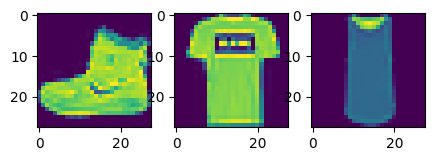

In [7]:
sample1 = train_images[0]
sample2 = train_images[1]
sample3 = train_images[2]
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (5,5))
ax1.imshow(sample1)
ax2.imshow(sample2)
ax3.imshow(sample3)

## Preprocessing
The data that is used to train a neural network usually needs to be processed. For this example, we need to change the range of the value for each pixel from 0 to 255 to 0..1. This helps our NN to fit the data more easily. 

In [8]:
train_images = train_images / 255
test_images = test_images / 255

## Creating the model
 Next we create the model using keras Sequential. This gives us a sequential neural network. In the following code, we create a model that has 784 input nodes. In the next layer we have 120 nodes that are densely connected by the nodes in the previous layer. In the output layer there are 10 nodes that stand for the ten labels of the dataset.

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(120,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

After creating the structure of the model, we need to set other parameters. The loss function, the optimizer and the metrics using the compile method.

In [22]:
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

## Training the model
Finally we use fit method to train our model.

In the following example, we used batch size = 100, meaning that in each learning loop keras runs forward algorithm on 100 samples and then calculates the loss to update the gradient. Therefore, for 60000 samples we run the learning loop 600 times. We run this training session 10 times. Overal we update the weights 6000 times.  

In [23]:
model.fit(train_images , train_labels , epochs=10 , batch_size=100)

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.5435 - accuracy: 0.8119
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4039 - accuracy: 0.8577
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3665 - accuracy: 0.8689
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3407 - accuracy: 0.8770
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3233 - accuracy: 0.8824
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3056 - accuracy: 0.8878
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2932 - accuracy: 0.8922
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2809 - accuracy: 0.8963
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2720 - accuracy: 0.8990
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2625 - accuracy: 0.9027

As you can see, the model gets better after each batch and and each epoch. However, we can also cancel the fitting process eralier using a kind of cancellation method!

The following code shows how we can use a callback function to cancel the training process when the loss value reached a specific threshold:

In [24]:
class LossCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("loss")< 0.4):
            print("\nReached 0.,6 accuracy")
            self.model.stop_training = True

loss = LossCallback()
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(120,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])
model.fit(train_images , train_labels , epochs=10 , batch_size=100 , callbacks=[loss])

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.5450 - accuracy: 0.8133
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4027 - accuracy: 0.8575
Epoch 3/10
599/600 [============================>.] - ETA: 0s - loss: 0.3617 - accuracy: 0.8712
Reached 0.,6 accuracy
600/600 [==============================] - 1s 2ms/step - loss: 0.3615 - accuracy: 0.8712


## Evaluating the model
Now that we created a model that has accuracy of 90 percent on our training model, we need to evaluate it on our test data set. Because this is the accuracy on the test data set that really matters.

In [22]:
model.evaluate(test_images,test_labels , verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8809


[0.3465520739555359, 0.8809000253677368]

As you can see, the accuracy on the testing data set is lower, which means that our model is kind of overfitting over training data. So we should try other parameters and test the model again. For example, I think that if I reduce the value for epochs it would be a good idea to avoid overfiting. In the following code I use epoch = 2

In [23]:
model.fit(train_images , train_labels , epochs=2)

Epoch 1/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2354 - accuracy: 0.9120
Epoch 2/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2266 - accuracy: 0.9145


In [24]:
model.evaluate(test_images,test_labels , verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8830


[0.34626972675323486, 0.8830000162124634]

As you can see, the accuracy on test data is higher afterusging epoch = 2. This process is called hyper parameter tuning. We have to use the best options and this is done by experience and knowledge. 

## Using the model
We can use the model the predict the label of new images:

1/1 [==============================] - 0s 26ms/step
[[2.2617279e-02 1.5867032e-08 9.7221428e-01 4.4797679e-07 4.7165938e-03
  6.9269222e-11 4.0245865e-04 3.5284944e-09 8.8268334e-06 4.0095576e-05]]
Pullover


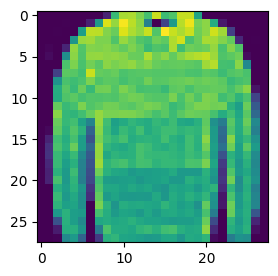

In [68]:
sample = test_images[20]
predictions = model.predict(sample)
print(predictions)
print(labels[np.argmax(predictions)])
fig , axes = plt.subplots(1,1,figsize=(3,3))
axes.imshow(sample)

In [1]:
import tensorflow as tf


2022-11-06 19:01:45.790094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
x = tf.ones(shape=(2,2))
y = tf.constant([[1.,2.],[3.,4.]])
print(x)
print(y)


tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


In [22]:
tf.matmul(x,y) # dot prduct

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 6.],
       [4., 6.]], dtype=float32)>

In [ ]:
input_var  = tf.random.uniform(shape=(10,1))
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)


## Binary classification

Two-class classification, or binary classification, is one of the most common kinds of machine learning problems. In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.

For this example, we use IMDB dataset. Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.



In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

This dataset has 25000 traning sample and 25000 samples for evaluation.

In [5]:
print(test_data.shape)
print(train_data.shape)

(25000,)
(25000,)


We can use the word index to decode the samples to the original sentences:

In [26]:
word_index = imdb.get_word_index()
word_index_reversed = dict([(v,k) for k,v in word_index.items()])
def decode(sample):
    return " ".join([word_index_reversed.get(k-3,"?") for k in sample])


In [27]:
decode(train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [29]:
decode(train_data[2])

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

As you can see, the trainning samples have different lengths:

In [11]:
[len(sample) for sample in train_data[:15]]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109]

However, neural networks need samples with equal lenghts to work. Therefore, we need a way to convert samples to the vectors with the same lengths.  There are two ways to do that:

1. Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, max_length), and start your model with a layer capa- ble of handling such integer tensors (the Embedding layer, which we’ll cover in detail later in the book).

2. Multi-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vec- tor that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use a Dense layer, capable of handling floating-point vector data, as the first layer in your model.

In [9]:
import numpy as np 
max_length = max([max(sample) for sample in train_data])
train_data_vectorized = np.zeros([len(train_data), max_length])

In [33]:
train_data_vectorized.shape

(25000, 9999)

In [10]:
def vectorize_sequences(samples, dimension=100000):
    results = np.zeros((len(samples), dimension))
    for i, sequence in enumerate(samples):
        for j in sequence:
            results[i, j] = 1.
    return results

In [11]:
train_x = vectorize_sequences(train_data)
test_x = vectorize_sequences(test_data)

Now, we define the structur of the neural network:

In [59]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")]
)

You may wonder why I chose 16 nodes for the first and the second layers, and 1 node for the output layer. First, I explain the thrid layer. Since our problem is a binary classification method, only one output node is enough to represent the final result. The final result of the sigmoid function is a number between 0 and 1, which is used to explain the probability of each class: a score between 0 and 1 indicating how likely the sample is to have the target “1”. The 1 is positive review and the label 0 is negative review.

Having 16 units in the first layer means the weight matrix W will have shape (input_dimension, 16): the dot product with W will project the input data onto a 16-dimensional representation space (and then you’ll add the bias vector b and apply the relu operation). You can intuitively understand the dimensionality of your representation space as “how much freedom you’re allowing the model to have when learning internal representations.” Having more units (a higher-dimensional representation space) allows your model to learn more-complex representations, but it makes the model more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).

In our example, the input vector's dimension is 10000. So our first layer represents the input data of 10000 values with a 10000x16 weight mnatix. The shape of the weight matrix of the next layer is 16x16. And the final layer is 16x1.

After structuring the data, we compile the neural network by setting the tuning parameters:

In [62]:
model.compile(optimizer="rmsprop" , loss="binary_crossentropy" , metrics=["accuracy"])

For this example, it is best to use the binary_crossentropy loss. It isn’t the only viable choice: for instance, you could use mean_squared_error. But crossentropy is usually the best choice when you’re dealing with models that output probabilities. Crossentropy is a quantity from the field of infor- mation theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

As for the choice of the optimizer, we’ll go with rmsprop, which is a usually a good default choice for virtually any problem.


Now, We train the model for 10 epochs (10 iterations over all samples in the trainng data) in mini-batches of 512 samples.

In [63]:
model.fit(train_x , train_label, epochs=10, batch_size=512)

Epoch 1/10
49/49 [==============================] - 19s 318ms/step - loss: 0.4404 - accuracy: 0.8273
Epoch 2/10
49/49 [==============================] - 17s 339ms/step - loss: 0.2528 - accuracy: 0.9135
Epoch 3/10
49/49 [==============================] - 16s 331ms/step - loss: 0.1962 - accuracy: 0.9310
Epoch 4/10
49/49 [==============================] - 16s 326ms/step - loss: 0.1663 - accuracy: 0.9409
Epoch 5/10
49/49 [==============================] - 16s 321ms/step - loss: 0.1449 - accuracy: 0.9489
Epoch 6/10
49/49 [==============================] - 16s 320ms/step - loss: 0.1278 - accuracy: 0.9559
Epoch 7/10
49/49 [==============================] - 16s 321ms/step - loss: 0.1149 - accuracy: 0.9605
Epoch 8/10
49/49 [==============================] - 18s 367ms/step - loss: 0.0986 - accuracy: 0.9662
Epoch 9/10
49/49 [==============================] - 20s 404ms/step - loss: 0.0914 - accuracy: 0.9695
Epoch 10/10
49/49 [==============================] - 15s 305ms/step - loss: 0.0819 - accura

After traininng we can use evaluate method to test the model on new data. However, it is very common that we use a validation set to monitor the accuracy of the model during training. 

In [67]:
train_data_validation_part = train_x[:10000]
train_data_fit_part = train_x[10000:]
train_label_validation_part = train_label[:10000]
train_label_fit_part = train_label[10000:]

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")]
)

model.compile(optimizer="rmsprop" , loss="binary_crossentropy" , metrics=["accuracy"])
history = model.fit(train_data_fit_part , train_label_fit_part, epochs=10, batch_size=512 , validation_data=(train_data_validation_part,train_label_validation_part))

Epoch 1/10
30/30 [==============================] - 29s 895ms/step - loss: 0.5376 - accuracy: 0.7791 - val_loss: 0.4115 - val_accuracy: 0.8643
Epoch 2/10
30/30 [==============================] - 14s 478ms/step - loss: 0.3273 - accuracy: 0.9018 - val_loss: 0.3135 - val_accuracy: 0.8899
Epoch 3/10
30/30 [==============================] - 15s 506ms/step - loss: 0.2358 - accuracy: 0.9279 - val_loss: 0.2900 - val_accuracy: 0.8873
Epoch 4/10
30/30 [==============================] - 15s 504ms/step - loss: 0.1843 - accuracy: 0.9415 - val_loss: 0.2723 - val_accuracy: 0.8913
Epoch 5/10
30/30 [==============================] - 15s 513ms/step - loss: 0.1504 - accuracy: 0.9530 - val_loss: 0.2938 - val_accuracy: 0.8830
Epoch 6/10
30/30 [==============================] - 16s 536ms/step - loss: 0.1254 - accuracy: 0.9611 - val_loss: 0.3045 - val_accuracy: 0.8805
Epoch 7/10
30/30 [==============================] - 16s 551ms/step - loss: 0.1064 - accuracy: 0.9679 - val_loss: 0.3029 - val_accuracy: 0.8838

We can use the hitory object for further investigation! Now, I use this history method to print the validation and loss value for validation set for each epoch.

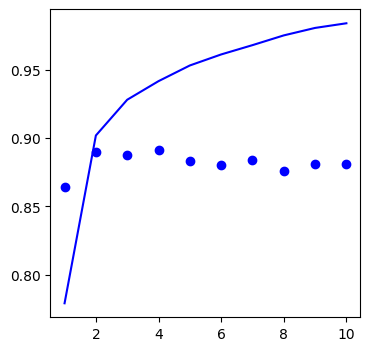

In [77]:
import matplotlib.pyplot as plt
history_dict = history.history
fig, axes = plt.subplots(1,1,figsize=(4,4))
epochs = range(1, len(history_dict["val_accuracy"])+1)
axes.plot(epochs, history_dict["val_accuracy"],"bo")
axes.plot(epochs, history_dict["accuracy"],"b")

As you can see, the accuracy on the training set increases every epoch, while the accuracy on the validation set bounces up and down after the second epoch. This example shows us that a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting: after the fourth epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set. There are a range of techniques to mitigate overfitting that we will cover later.

## Multiclass classifiction

In this section, we’ll build a model to classify Reuters newswires into 46 mutually exclusive topics. Because we have many classes, this problem is an instance of multiclass classification, and because each data point should be classified into only one category, the problem is more specifically an instance of single-label multiclass classification.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
(train_data, train_label) , (test_data, test_label) = reuters.load_data(num_words=10000)

2022-11-14 17:17:12.070837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2110848/2110848 [==============================] - 3s 2us/step


As with the IMDB dataset, the argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data. As with the IMDB reviews, each example is a list of integers, and you can use the reversed index in order to decode the samples.

The important difference between reuters dataset and the imdb dataset is the number of classes. We have 46 classes here, so we need a way to represent the label There are two ways to do this:

1. We can use a loss function called sparse_categorical_crossentropy that uses class labels as indexes.

2. It is also possible to represent the labels using one-hot encoding. One-hot encoding is a widely used format for categorical data, also called categorical encoding. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index.

There is a builtin method to do this in keras:

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)

In [5]:
print(y_train[0])
print(train_label[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3


In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In a stack of Dense layers like those we’ve been using, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottle- neck. In the previous example, we used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information.

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(46, activation="sigmoid")
])

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [30]:
model.fit(train_x,y_train,epochs=2,batch_size=512)

Epoch 1/2
18/18 [==============================] - 8s 279ms/step - loss: 2.7064 - accuracy: 0.5247
Epoch 2/2
18/18 [==============================] - 3s 140ms/step - loss: 1.4623 - accuracy: 0.7072


In [36]:
predictions = model.predict(x_test[0:1])

1/1 [==============================] - 0s 29ms/step


In [41]:
predictions.sum()

14.486659

As you see, the sum of allprediction for classes is larger than 1 so this is not suitable. Therefore we change our activation function for the last layer.

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(46, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [43]:
model.fit(train_x,y_train,epochs=2,batch_size=512)

Epoch 1/2
18/18 [==============================] - 9s 286ms/step - loss: 2.6278 - accuracy: 0.5551
Epoch 2/2
18/18 [==============================] - 3s 149ms/step - loss: 1.3798 - accuracy: 0.7216


In [44]:
predictions = model.predict(x_test[0:1])
predictions.sum()

1/1 [==============================] - 0s 74ms/step


1.0

Now you see that the final sum returns 1 which shows that we have used an appropriate activation function to make up a correct probability distribution for 46 classes. The maximum probability shows the label that should be chosen for the sample:

In [46]:
print(np.argmax(predictions))

3


Lets increase the epochs and see the difference:

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(46, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history = model.fit(train_x[1000:],y_train[1000:],epochs=20,batch_size=512 , validation_data=(train_x[:1000],y_train[:1000]))

Epoch 1/20
16/16 [==============================] - 10s 410ms/step - loss: 2.7833 - accuracy: 0.5361 - val_loss: 1.8471 - val_accuracy: 0.6650
Epoch 2/20
16/16 [==============================] - 4s 278ms/step - loss: 1.4623 - accuracy: 0.7174 - val_loss: 1.3389 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 3s 174ms/step - loss: 1.0569 - accuracy: 0.7795 - val_loss: 1.1380 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 3s 169ms/step - loss: 0.8256 - accuracy: 0.8264 - val_loss: 1.0307 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 3s 178ms/step - loss: 0.6595 - accuracy: 0.8633 - val_loss: 0.9569 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 3s 171ms/step - loss: 0.5306 - accuracy: 0.8940 - val_loss: 0.9186 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 3s 168ms/step - loss: 0.4260 - accuracy: 0.9127 - val_loss: 0.9295 - val_accuracy: 0.8040
Epoch

As you see , the accuracy on the validation set increasesed until epoch 6 but then it bums up and down.



Here’s what you should take away from this example:
* If you’re trying to classify data points among N classes, your model should end with a Dense layer of size N.
* In a single-label, multiclass classification problem, your model should end with a softmax activation so that it will output a probability distribution over the N output classes.
* Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the model and the true distribution of the targets.
* There are two ways to handle labels in multiclass classification:
 - Encoding the labels via categorical encoding (also known as one-hot encod-
ing) and using categorical_crossentropy as a loss function
 - Encoding the labels as integers and using the sparse_categorical_cross-
entropy loss function
* If you need to classify data into a large number of categories, you should avoid
creating information bottlenecks in your model due to intermediate layers that are too small.

## Regression

For this section we use Boston housing price dataset:

In [33]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

This dataset is a alittle different from the previous ones we worked on.
First of all, the target values are not the class labels, which seems quite normal as it is a regression rpoblem not a classification problem.

In [34]:
train_labels[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

Moreover, the data values of different features have different scales. For example, the values of the third feature are larger than 1, while the values of fifth feature are between zero and 1.

In [35]:
print(train_data[:10,2])
print(train_data[:10,4])

[ 8.14  2.03 18.1   5.19 18.1   7.38 18.1  19.58 19.58 21.89]
[0.538 0.415 0.631 0.515 0.713 0.493 0.7   0.871 0.871 0.624]


It causes problems for training. Therefore, we usually do feature-wise normalization before we start training. It means that When your data has features with different ranges, we must scale each feature inde pendently as part of preprocessing. In other words, For each feature in the input data (a column in the input data matrix), we subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation.

In [36]:

means = np.mean(train_data, axis=0)
stds = np.std(train_data, axis=0)
train_data -= means
train_data /= stds

test_data -= means
test_data /= stds

Now. all the data is centered around 0 and the large values scaled down to be around -1 to 1.

An important note: You should never use any quantity computed on the test data in your workflow, even for something as simple as data normalization.

In [37]:
print(train_data[:10,2])
print(train_data[:10,4])

[-0.43576161 -1.33391162  1.0283258  -0.86940196  1.0283258  -0.54747912
  1.0283258   1.24588095  1.24588095  1.58544339]
[-0.1652266  -1.21518188  0.62864202 -0.3615597   1.32861221 -0.54935658
  1.21764133  2.67733525  2.67733525  0.56888847]


building model

Another important feature of this dataset is the low number of training samples. In general, the less training data you have, the worse overfitting will be, and using a small model is one way to mitigate overfitting. Therefore, we’ll use a very small model with two intermediate layers, each with 64 units.

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1),
])

model.compile(optimizer="rmsprop", loss="mse" ,metrics=["mae"])

2022-11-15 17:00:52.328560: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


* The final layer: The model ends with a single unit and no activation (it will be a linear layer). This is a typical setup for scalar regression (a regression where you’re trying to predict a single continuous value). Applying an activation function would constrain the range the out- put can take; for instance, if you applied a sigmoid activation function to the last layer, the model could only learn to predict values between 0 and 1. Here, because the last layer is purely linear, the model is free to learn to predict values in any range.

* The loss function: Note that we compile the model with the mse loss function—mean squared error, the square of the difference between the predictions and the targets. This is a widely used loss function for regression problems.

* We’re also monitoring a new metric during training: mean absolute error (MAE). It’s the absolute value of the difference between the predictions and the targets. For instance, an MAE of 0.5 on this problem would mean your predictions are off by $500 on average.

Validating your approach using K-fold validation

To evaluate our model while we keep adjusting its parameters (such as the number of epochs used for training), we could split the data into a training set and a validation set, as we did in the previous examples. But because we have so few data points, the validation set would end up being very small (for instance, about 100 examples). As a consequence, the validation scores might change a lot depending on which data points we chose for validation and which we chose for training: the validation scores might have a high variance with regard to the validation split. This would prevent us from reliably evaluating our model.

The best practice in such situations is to use K-fold cross-validation 

In [71]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64,activation="relu"),
        tf.keras.layers.Dense(64,activation="relu"),
        tf.keras.layers.Dense(1),
    ])
    model.compile(optimizer="rmsprop", loss="mse" ,metrics=["mae"])
    return model


def kfold(data, target, k , build_model, epochs , batch_size , v):
    all_scores = []
    size = len(data) // k
    for i in range(k):
        val_data = data[i*size:(i+1)*size]
        val_target = target[i*size:(i+1)*size]
        train_data = np.concatenate([data[:i*size], data[(i+1)*size:]])
        train_target = np.concatenate([target[:i*size], target[(i+1)*size:]])
        model = build_model()
        model.fit(train_data , train_target  , epochs=epochs , batch_size=batch_size, verbose=0)
        val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
        if(v):
            print("MAE for fold {} = {}".format(i+1 , val_mae))
        all_scores.append(val_mae)
    return np.mean(all_scores)

In [72]:
average_mae = kfold(train_data , train_labels, 5 , build_model, 10, 16 , True)
print("Average mae = " , average_mae)

MAE for fold 1 = 2.9821274280548096
MAE for fold 2 = 3.6640167236328125
MAE for fold 3 = 2.979674816131592
MAE for fold 4 = 2.883089780807495
MAE for fold 5 = 3.7831242084503174
Average mae =  3.2584065914154055


In [76]:
mae_array = []
for i in range(300):
    mae = kfold(train_data , train_labels, 5 , build_model, i+1, 16 , False)
    mae_array.append(mae)

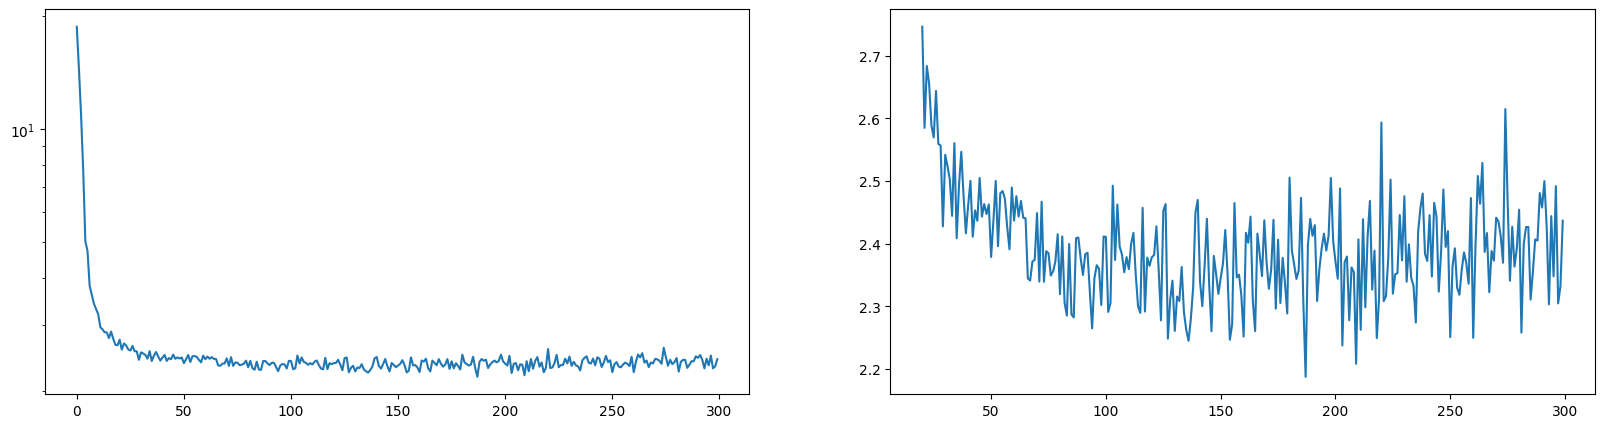

In [85]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(1,2, figsize=(20,5))
axis[0].set_yscale("log")
axis[0].plot(range(300), mae_array)

axis[1].plot(range(20,300), mae_array[20:])

# Fundamentals of machine learning

The fundamental issue in machine learning is the tension between optimization and generalization. Optimization refers to the process of adjusting a model to get the best performance possible on the training data (the learning in machine learning), whereas generalization refers to how well the trained model performs on data it has never seen before. The goal of the game is to get good generalization, of course, but you don’t control generalization; you can only fit the model to its training data. If you do that too well, overfitting kicks in and generalization suffers.

<img src="images/overfitting.png" width="50%">

At the beginning of training, optimization and generalization are correlated: the lower the loss on training data, the lower the loss on test data. While this is happening, your model is said to be underfit: there is still progress to be made; the network hasn’t yet modeled all relevant patterns in the training data. But after a certain number of iterations on the training data, generalization stops improving, validation metrics stall and then begin to degrade: the model is starting to overfit. That is, it’s beginning to learn patterns that are specific to the training data but that are misleading or irrele- vant when it comes to new data.


Overfitting always happens during the training phase but some factors increase the chance of overfitting. 
It is particularly likely to occur when your data is noisy, if it involves uncertainty, or if it includes rare features. Let’s look at concrete examples.

1. NOISY TRAINING DATA: If a model goes out of its way to incorporate many outliers, its generalization performance will degrade. We need robust fit but noisy data makes our learning process to overfit the model:

<img src="./images/robust_fit_vs_overfit.png" width="50%">


2. AMBIGUOUS FEATURES: Sometimes, noise comes from uncertainty and ambiguity. Let’s say you’re developing a model that takes an image of a banana and predicts whether the banana is unripe, ripe, or rotten. These categories have no objective boundaries, so the same picture might be classified as either unripe or ripe by different human labelers. Therefore, we have similar samples with different labels. This is called ambiguity in data. This ambiguity are is shown in the following picture. As you can see, a more robust fit helps us ignore individual data points in the area of uncertainty and look at the bigger picture.

<img src="./images/uncertainty.png" width="50%">

3. RARE FEATURES: If you’ve only ever seen two orange tabby cats in your life, and they both happened to be terribly antisocial, you might infer that orange tabby cats are generally likely to be antisocial. That’s overfitting: if you had been exposed to a wider variety of cats, including more orange ones, you’d have learned that cat color is not well correlated with character. Please pay attention that this is different from when we have noisy data. In noisy data, we have wrong labels or a sample with wrong values. It is also different from ambiguous features, as the color orange is not ambiguous.

4. SPURIOUS CORRELATIONS: Importantly, a feature value doesn’t need to occur only a couple of times to lead to spurious correlations. Consider a word that occurs in 100 samples in your training data and that’s associated with a positive sentiment 54% of the time and with a negative sentiment 46% of the time. That difference may well be a complete statistical fluke, yet your model is likely to learn to leverage that feature for its classification task. This is one of the most common sources of overfitting. For example suppose we manipulate MNIST dataset and create two different datasets. The first one is created by adding zeros, while the second one is created using white noise. By training we find out that white noise reduces the accuracy of the model on the evaluation set. 

<img src="./images/white-noise.png" width="50%">

Although concatenating white noise does not change the information that each sample holds, the accuracy has reduced compared with zero channels. This shows that, spurious correlation can happen even when the features are quite common in the data.




## THE MANIFOLD HYPOTHESIS

The manifold hypothesis implies that
1. Machine learning models only have to fit relatively simple, low-dimensional, highly structured subspaces within their potential input space (latent manifolds).
2. Within one of these manifolds, it’s always possible to interpolate between two inputs, that is to say, morph one into another via a continuous path along which all points fall on the manifold.
The ability to interpolate between samples is the key to understanding generalization in deep learning.


Machine learning is the process of interpolating between sample datas to model the natural data. 

TRAINING DATA IS PARAMOUNT

While deep learning is indeed well suited to manifold learning, the power to general- ize is more a consequence of the natural structure of your data than a consequence of any property of your model.

Dense sampling

A “dense sampling” in this context means that the training data should densely cover the entirety of the input data manifold. This is especially true near decision boundaries. With a sufficiently dense sampling, it becomes possible to make sense of new inputs by interpolating between past training inputs without having to use common sense, abstract reasoning, or external knowledge about the world—all things that machine learning models have no access to.



## Improving model fit and generalization

When you want to solve a problem by developing a model. You need to improve the model until you reach the best perfect tradeoff between model fiting and model generalization.

Before you start working with a dataset, you should always pick a trivial baseline that you’ll try to beat. If you cross that threshold, you’ll know you’re doing something right: your model is actually using the information in the input data to make predictions that generalize, and you can keep going. This baseline could be the performance of a random classifier, or the performance of the simplest non-machine learning technique you can imagine.

For instance, in the MNIST digit-classification example, a simple baseline would be a validation accuracy greater than 0.1 (random classifier); in the IMDB example, it would be a validation accuracy greater than 0.5. In the Reuters example, it would be around 0.18-0.19, due to class imbalance. If you have a binary classification problem where 90% of samples belong to class A and 10% belong to class B, then a classifier that always predicts A already achieves 0.9 in validation accuracy, and you’ll need to do better than that.

Having a common-sense baseline you can refer to is essential when you’re getting started on a problem no one has solved before. If you can’t beat a trivial solution, your model is worthless—perhaps you’re using the wrong model, or perhaps the problem you’re tackling can’t even be approached with machine learning in the first place. Time to go back to the drawing board.


### Improving model fit
To achieve the perfect fit, you must first overfit. Since you don’t know in advance where the boundary lies, you must cross it to find it. Thus, your initial goal as you start working on a problem is to achieve a model that shows some generalization power and that is able to overfit. Once you have such a model, you’ll focus on refining generalization by fighting overfitting.

There are three common problems you’ll encounter at this stage:
1. Training doesn’t get started: your training loss doesn’t go down over time.

2. Training gets started just fine, but your model doesn’t meaningfully generalize: you can’t beat the common-sense baseline you set.

3. Training and validation loss both go down over time, and you can beat your baseline, but you don’t seem to be able to overfit, which indicates you’re still underfitting.

According to this problems, we define three distinctive tasks for our fitting process:

1. We try to find the best training parameters to help our model start fitting. 

2. We try different appropriate arcituctures to cross the baseline.

3. We try to increase the capacity of our model and reach the overfit point.


#### Tuning key gradient descent parameters
For the second problem, oyu have to tune the gradient descent parameters. Actually, The first problem is always something you can overcome: remember that you can fit a model to random data. Even if nothing about your problem makes sense, you should still be able to train something—if only by memorizing the training data.

When this happens, it’s always a problem with the configuration of the gradient descent process: your choice of optimizer, the distribution of initial values in the weights of your model, your learning rate, or your batch size. All these parameters are interdependent, and as such it is usually sufficient to tune the learning rate and the batch size while keeping the rest of the parameters constant.

For example, look at the accuracy of the following models on the same data from the MNISt dataset. The first one has not get trained at all because we have used an inappropriate training rate of 1. However, the second configuration works well andits accuracy starts growing.

In [50]:
(train_images, train_labels) , (test_images,test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images/ 256
test_images = test_images/ 256

In [93]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(120,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(1) , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 69.9407 - accuracy: 0.1048
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 4.6945 - accuracy: 0.1014
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5735 - accuracy: 0.1012
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5089 - accuracy: 0.1028
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5105 - accuracy: 0.1041
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5059 - accuracy: 0.1063
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5077 - accuracy: 0.1045
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4998 - accuracy: 0.1066
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4946 - accuracy: 0.1071
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.49

In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(120,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.compile(optimizer="rmsprop" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])
history = model.fit(train_images,train_labels,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5006 - accuracy: 0.8228
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3746 - accuracy: 0.8663
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3439 - accuracy: 0.8779
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3277 - accuracy: 0.8842
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3177 - accuracy: 0.8892
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3059 - accuracy: 0.8936
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3007 - accuracy: 0.8965
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8986
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2855 - accuracy: 0.9012
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.282

#### Modifying the arcitucture 

Sometimes, for some reason your validation metrics aren’t improving at all. They just work as good as a random classifier. In other words, your model fits to the training data. Remember that the model can fit even to completely random data in machine learning. But there is something wrong that its accurcay does not grow up over time. You have reached the baseline because your hyper paramters are good, but yo can not improve it to work better than that. There are two treasons that may lead to this:

First, it may be that the input data you’re using simply doesn’t contain sufficient information to predict your target. For example lets shuffle the labels in the MNIST dataset and try to train the exactly same model.

In [40]:
labels = np.copy(train_labels)
np.random.shuffle(labels)

array([9, 9, 1, ..., 8, 7, 5], dtype=uint8)

In [48]:
print(train_labels)
print(labels)

[9 0 0 ... 3 0 5]
[9 9 1 ... 8 7 5]


Then, we use the same parameters to train the model on the shuffeled data

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(120,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.compile(optimizer="rmsprop" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])
model.fit(train_images,labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3108 - accuracy: 0.1018
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3048 - accuracy: 0.1006
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3047 - accuracy: 0.1010
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3036 - accuracy: 0.1043
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3035 - accuracy: 0.1059
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3025 - accuracy: 0.1068
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3011 - accuracy: 0.1082
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2996 - accuracy: 0.1085
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2981 - accuracy: 0.1110
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.295

You can see that the accuracy does not grow up. This is because there is no information in the data to be learned.

However, the dataset has almost always something to be modeled. This is a very rare situation that you come across to a dataset that is completely rubish! It may also be that the kind of model you’re using is not suited for the problem at hand. 

#### Increasing the capacity of the model
Looking at the accuracy of the best model of us, we can see that the accuracy went up very  wel, but it never reached a turning point. Therefore we have not reached an overfit yet. We have acheived a model that has crossed the baseline classifier, has started learning the information and a resulted a good accuracy.

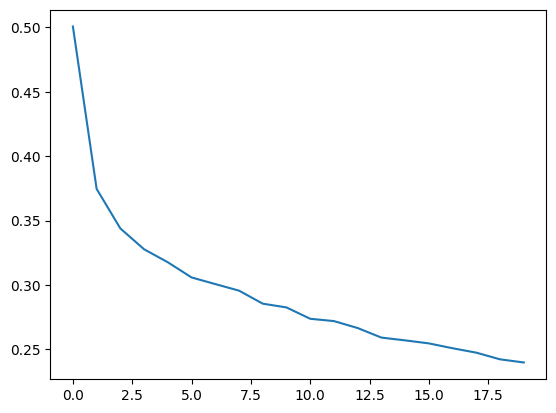

In [95]:
fix, axis = plt.subplots(1,1)
axis.plot(history.history["loss"])

However, we always have to find an overfit. The final try will be changing the structure of the neural network to help it contain more information. Increasing the capacity of the NN is actually increasing the number of weights it can hold. We do thid bu adding extra layers and neorons.

To overfit data:

1. Add layers.
2. Make the layers bigger.
3. Train for more epochs.

In [90]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(240, activation="relu"),
    tf.keras.layers.Dense(240, activation="relu"),
    tf.keras.layers.Dense(240, activation="relu"),
    tf.keras.layers.Dense(240, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images,train_labels,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5333 - accuracy: 0.8090
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4378 - accuracy: 0.8499
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4338 - accuracy: 0.8586
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4204 - accuracy: 0.8612
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4156 - accuracy: 0.8654
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4114 - accuracy: 0.8673
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4119 - accuracy: 0.8712
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4173 - accuracy: 0.8719
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4041 - accuracy: 0.8745
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.416

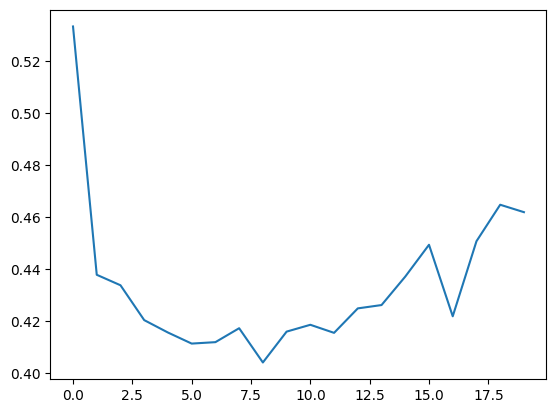

In [91]:
fix, axis = plt.subplots(1,1)
axis.plot(history.history["loss"])

The char shows that we can reach the overfit point after 8 epochs, by adding three layers to the network. In fact, the representational power of the model increases, when we increase the number of the neurons.

### Improving generalization

Once your model has shown itself to have some generalization power and to be able to overfit, it’s time to switch your focus to maximizing generalization.

Generalization in deep learning originates from the latent structure of your data. If your data makes it possible to smoothly interpolate between samples, you will be able to train a deep learning model that generalizes.

If your problem is overly noisy or fundamentally discrete, like, say, list sorting, deep learning will not help you. Deep learning is curve fitting, not magic.

We already mentioned that there are four problems that prevent generalization.
1. Noisy data
2. Ambiguous features
3. Rare features
4. Spurious features

To solve these problems we perform the following tasks:
1. gathering more data for dense sampling
2. Proofreading labels
3. Data cleaning
4. Feature selection




#### Feature engineering

Feature engineering is the process of using your own knowledge about the data and about the machine learning algorithm at hand (in this case, a neural network) to make the algorithm work better by applying hardcoded (non-learned) transformations to the data before it goes into the model. In many cases, it isn’t reasonable to expect a machine learning model to be able to learn from completely arbitrary data. The data needs to be presented to the model in a way that will make the model’s job easier.

That’s the essence of feature engineering: making a problem easier by expressing it in a simpler way. Make the latent manifold smoother, simpler, better organized. Doing so usually requires understanding the problem in depth.

Before deep learning, feature engineering used to be the most important part of the machine learning workflow, because classical shallow algorithms didn’t have hypothesis spaces rich enough to learn useful features by themselves. The way you pre- sented the data to the algorithm was absolutely critical to its success. For instance, before convolutional neural networks became successful on the MNIST digit-classifi- cation problem, solutions were typically based on hardcoded features such as the number of loops in a digit image, the height of each digit in an image, a histogram of pixel values, and so on.


Fortunately, modern deep learning removes the need for most feature engineer- ing, because neural networks are capable of automatically extracting useful features from raw data. Does this mean you don’t have to worry about feature engineering as long as you’re using deep neural networks? No, for two reasons:

* Good features still allow you to solve problems more elegantly while using fewer resources. For instance, it would be ridiculous to solve the problem of reading a clock face using a convolutional neural network.

* Good features let you solve a problem with far less data. The ability of deep learning models to learn features on their own relies on having lots of training data available; if you have only a few samples, the information value in their fea- tures becomes critical.


#### Using early stopping

EarlyStopping callback,

#### Regularizing the model

1. REDUCING THE NETWORK’S SIZE:
2. ADDING WEIGHT REGULARIZATION: (L1, L2 regularization) kernel_regularizer=regularizers.l2(0.002)
3. ADDING DROPOUT: layers.Dropout(0.5),

## Summary 

* When you start working on a model, your goal is first to achieve a model that has some generalization power and that can overfit. Best practices for doing this include tuning your learning rate and batch size, leveraging better architec- ture priors, increasing model capacity, or simply training longer.

* As your model starts overfitting, your goal switches to improving generalization through model regularization. You can reduce your model’s capacity, add dropout or weight regularization, and use early stopping. And naturally, a larger or better dataset is always the number one way to help a model generalize. 

# Machine learning workflow

## collecting dataset

### Concept drift
You’ll encounter concept drift in almost all real-world problems, especially those that deal with user- generated data. Concept drift occurs when the properties of the production data change over time, causing model accuracy to gradually decay. A music recommenda- tion engine trained in the year 2013 may not be very effective today.

Likewise, the IMDB dataset you worked with was collected in 2011, and a model trained on it would likely not perform as well on reviews from 2020 compared to reviews from 2012, as vocabulary, expressions, and movie genres evolve over time.

Dealing with fast concept drift requires constant data collection, annotation, and model retraining.

### sampling bias

Sampling bias occurs when your data collection process interacts with what you are trying to predict, resulting in biased measurements

### Choose a measure of success

For balanced classification problems, where every class is equally likely, accuracy and the area under a receiver operating characteristic (ROC) curve, abbreviated as ROC AUC, are common metrics. For class-imbalanced problems, ranking problems, or multilabel classification, you can use precision and recall, as well as a weighted form of accuracy or ROC AUC. And it isn’t uncommon to have to define your own custom metric by which to measure success. To get a sense of the diversity of machine learning success metrics and how they relate to different problem domains, it’s helpful to browse the data science competitions on Kaggle (https://kaggle.com); they showcase a wide range of problems and evaluation metrics.

## Develop a model

### Preparing the data

Data preparation method are two types. The first one is domain specific preprocessing. For example text data and image data need different preperation. However, the second category is general. We have some preparation taska that are applicable for all sorts of data:
1. Vectorization: Whatever data you need to process—sound, images, text you must first turn into tensors, a step called data vectorization.
2. Value normalization: In general, it isn’t safe to feed into a neural network data that takes relatively large values (for example, multi-digit integers, which are much larger than the initial values taken by the weights of a network) or data that is heterogeneous (for example, data where one feature is in the range 0–1 and another is in the range 100–200). Doing so can trigger large gradient updates that will prevent the network from converging. To make learning easier for your network, your data should have the following characteristics:
    * Take small values—Typically, most values should be in the 0–1 range.
    * Be homogenous—All features should take values in roughly the same range.

    Additionally, the following stricter normalization practice is common and can help, although it isn’t always necessary (for example, we didn’t do this in the digit-classifica- tion example):
    * Normalize each feature independently to have a mean of 0. <code>x -= x.mean(axis=0)</code>
    * Normalize each feature independently to have a standard deviation of 1. <code>x /= x.std(axis=0)</code>
3. Handling missing values:
    * If the feature is categorical, it’s safe to create a new category that means “the value is missing.” The model will automatically learn what this implies with respect to the targets.
    * If the feature is numerical, avoid inputting an arbitrary value like "0", because it may create a discontinuity in the latent space formed by your features, mak- ing it harder for a model trained on it to generalize. Instead, consider replac- ing the missing value with the average or median value for the feature in the dataset. You could also train a model to predict the feature value given the val- ues of other features.

    Note that if you’re expecting missing categorial features in the test data, but the network was trained on data without any missing values, the network won’t have learned to ignore missing values! In this situation, you should artificially generate training samples with missing entries: copy some training samples several times, and drop some of the categorical features that you expect are likely to be missing in the test data.


### Beat a baseline
As you start working on the model itself, your initial goal is to achieve statistical power with a trivial model. You have to select features and a structure for your model that can beat the baseline classifier on your data.

If you failed to beat the baseline, review the first hypothesies. Remember that:
* You hypothesize that your outputs can be predicted given your inputs.
* You hypothesize that the available data is sufficiently informative to learn the



### Scale up: Develop a model that overfits

Once you’ve obtained a model that has statistical power, the question becomes, is your model sufficiently powerful? You have to develop the model by increasing the capacity of it by:

1. Add layers.
2. Make the layers bigger.
3. Train for more epochs.


### Regularize and tune your model

Once you’ve achieved statistical power and you’re able to overfit, you know you’re on the right path. At this point, your goal becomes to maximize generalization performance.

Use the following mehotd to generalize the model:
    1. Try different architectures; add or remove layers.
    2. Add dropout.
    3. If your model is small, add L1 or L2 regularization.
    4. Try different hyperparameters (such as the number of units per layer or the learning rate of the optimizer) to find the optimal configuration.
    5. Optionally, iterate on data curation or feature engineering: collect and anno- tate more data, develop better features, or remove features that don’t seem to
be informative.

Once you’ve developed a satisfactory model configuration, you can train your final production model on all the available data (training and validation) and evalu- ate it one last time on the test set. If it turns out that performance on the test set is significantly worse than the performance measured on the validation data, this may mean either that your validation procedure wasn’t reliable after all, or that you began overfitting to the validation data while tuning the parameters of the model. In this case, you may want to switch to a more reliable evaluation protocol (such as iterated K-fold validation).

## Deploy the model

Optimizing your model for inference is especially important when deploying in an environment with strict constraints on available power and memory (smartphones and embedded devices) or for applications with low latency requirements. You should always seek to optimize your model before importing into TensorFlow.js or exporting it to TensorFlow Lite.

There are two popular optimization techniques you can apply:

* Weight pruning—Not every coefficient in a weight tensor contributes equally to the predictions. It’s possible to considerably lower the number of parameters in the layers of your model by only keeping the most significant ones. This reduces the memory and compute footprint of your model, at a small cost in performance metrics. By deciding how much pruning you want to apply, you are in control of the trade-off between size and accuracy.

* Weight quantization—Deep learning models are trained with single-precision floating-point (float32) weights. However, it’s possible to quantize weights to 8-bit signed integers (int8) to get an inference-only model that’s a quarter the size but remains near the accuracy of the original model.
The TensorFlow ecosystem includes a weight pruning and quantization toolkit (www .tensorflow.org/model_optimization) that is deeply integrated with the Keras API.



# Keras: deep dive

Different ways to build Keras models
There are three APIs for building models in Keras:

1. The Sequential model, the most approachable API—it’s basically a Python list. As such, it’s limited to simple stacks of layers.
2. The Functional API, which focuses on graph-like model architectures. It rep- resents a nice mid-point between usability and flexibility, and as such, it’s the most commonly used model-building API.
3. Model subclassing, a low-level option where you write everything yourself from scratch. This is ideal if you want full control over every little thing. However, you won’t get access to many built-in Keras features, and you will be more at risk of making mistakes.

## The sequential model
The simplest way to build a Keras model is to use the Sequential model, which you already know about.

In [ ]:
import tensorflow as tf

In this approach we simply pass the netwrok structur as a python list:

In [4]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(10)
])

It is also possible to use the add method to create the same model:

In [5]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(64))
model2.add(tf.keras.layers.Dense(10))

In the following code we use the summary method to print both models. However, we first need to Build the model first by calling `build()` or by calling the model on a batch of data:

In [6]:
model1.build(input_shape=(None,3))
model2.build(input_shape=(None,3))

You can see that both models are equal, the only thing that differs is the name of the model:

In [8]:
print(model1.summary())
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable p

Despite, the weights are different because the model is always initialized with random weights.

In [37]:
print(model1.weights[0][1])
print(model2.weights[0][1])

tf.Tensor(
[-0.06775422 -0.19093534 -0.21812984  0.12338623  0.0663327   0.15892798
 -0.10903206  0.09251344  0.07081196 -0.217424   -0.16687007  0.17748958
 -0.13472243 -0.10709435 -0.03846568  0.1570397  -0.19483228 -0.13649534
 -0.2394887   0.13166034 -0.19519144  0.00191569 -0.02829167 -0.27368882
  0.1158058   0.21965247 -0.19949919  0.15521097 -0.119019   -0.01391652
 -0.20205057  0.19069561  0.07642886 -0.1565145  -0.02835897 -0.00901759
 -0.24508148  0.10334888  0.06167564  0.16822633  0.03038779 -0.16882014
  0.23144579 -0.12189765  0.2405743   0.20355564 -0.2595927   0.1493854
 -0.22195593  0.03591409  0.19639036 -0.07977748 -0.11676584 -0.18863247
  0.0816049  -0.24266595  0.08917221 -0.25482312  0.16796333  0.04324281
 -0.02281848  0.08483517  0.16370833 -0.25576377], shape=(64,), dtype=float32)
tf.Tensor(
[ 0.23147792  0.05583322  0.04089862  0.22092438  0.24281728  0.0777005
  0.27601296  0.12617415  0.0698646  -0.21956515  0.15236884  0.21393824
  0.14203134 -0.1178671  

We can also change the name of the model

In [38]:
model = tf.keras.Sequential(name="example_model")
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(10))
model.build(input_shape=(None,3))
model.summary()

Model: "example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


Sometimes you need to get the summary of the model when you add the layers incrementally. In this scenario, you can set the input shape for the model so you do not need to build the model as it gets built on the fly:

In [39]:
model = tf.keras.Sequential(name="test_model")
model.add(tf.keras.Input(shape=(None,3)))
model.add(tf.keras.layers.Dense(10))
model.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, None, 10)          40        
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


## The functional API

The Sequential model is easy to use, but its applicability is extremely limited: it can only express models with a single input and a single output, applying one layer after the other in a sequential fashion. In practice, it’s pretty common to encounter models with multiple inputs (say, an image and its metadata), multiple outputs (different things you want to predict about the data), or a nonlinear topology.

In such cases, you’d build your model using the Functional API. This is what most Keras models you’ll encounter in the wild use. It’s fun and powerful. it feels like playing with LEGO bricks.